In [9]:
#diabetes df
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns


In [10]:
directory = 'C:/Users/N1110/Desktop/7331_Project/data/'
df = pd.read_csv(directory + 'Diabetes_tmp_Cleaned.csv')
df_clean = df
df_clean.replace('?', np.nan, inplace=True)

In [5]:
df_clean.shape

(101766, 51)

## Data Meaning Type
#need revise, need to write after cleaning data
# need to transform features to numercial first
Data fields

    'encounter_id' unique identifier of an encounter
    'patient_nbr' unique identifier of a patient
    'race' patient race
    'gender' patient gender   # gender need to be in 0 and 1 and describe 0 for male, 1 for female in this section
    'age' patient aged (binned in intervals of 10 years)
    'weight' weight in pounds
    'admission_type_id' type of admission in the hospital
    'discharge_disposition_id' reason for discharge
    'admission_source_id' source of admission
    'time_in_hospital' number of days between admission and discharge
    'payer_code' identifier for type of insurance/payment
    'medical_specialty' specialty of the admitting physician
    'num_lab_procedures' number of lab tested performed during encounter
    'num_procedures' numbver of procedures (other than lab tests) during encounter
    'num_medications' number of distinct medications administered during the encounter
    'number_outpatient' number of outpatient visits on the year preceding the encounter
    'number_emergency' number of emergency visits in the year preceding the encouunter
    'number_inpatient' number of inpatient visits in the year preceding the encounter
    'diag_1' primary diagnosis
    'diag_2' secondary diagnosis
    'diag_3' additional secondary diagnosis
    'number_diagnoses' number of diagnoses entered in the system
    'max_glu_serum' glucose serum test result
    'A1Cresult'  A1c test result
    The following 24 features indicate changes in dosage of 24 distinct medications:
        'metformin'
        'repaglinide'
        'nateglinide'
        'chlorpropamide'
        'glimepiride'
        'acetohexamide'
        'glipizide'
        'glyburide'
        'tolbutamide'
        'pioglitazone'
        'rosiglitazone'
        'acarbose'
        'miglitol'
        'troglitazone'
        'tolazamide'
        'examide'
        'citoglipton'
        'insulin'
        'glyburide-metformin'
        'glipizide-metformin'
        'glimepiride-pioglitazone'
        'metformin-rosiglitazone'
        'metformin-pioglitazone'
    'change'  if there was change in the patient's diabetes medication
    'diabetesMed' if diabetes medication was prescribed
    'readmitted' the target variable: either "NO", "<30" or ">30"


In [16]:
#Data Type
#majority categorical

df_clean.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

In [6]:
#Simple Statistics
df_clean.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_tf,medication_count,meds_increased
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.675904,4.388362,4.372443,4.589696,34.047383,1.456577,16.560492,0.369357,0.212232,0.635566,7.422607,0.460881,1.178616,0.120089
std,1.026403e+08,3.869636e+07,1.530799,6.013795,4.687549,3.160314,22.386944,1.792201,9.105980,1.267265,0.917842,1.262863,1.933600,0.498470,0.924977,0.325067
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,16.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000
50%,1.523890e+08,4.550514e+07,3.000000,1.000000,2.000000,4.000000,30.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000
75%,2.302709e+08,8.754595e+07,4.000000,6.000000,7.000000,6.000000,49.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,2.000000,0.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,129.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,6.000000,1.000000


In [7]:
missing = pd.DataFrame({'column':df.columns ,'na_percent':df.isnull().sum()/len(df)*100, 'na_count':df.isnull().sum()})
missing[missing.na_percent > 0]

,column,na_percent,na_count
admission_source,admission_source,5.879174,5983
discharge_disposition,discharge_disposition,3.616139,3680
admission_type,admission_type,4.011163,4082


In [8]:
pandas_profiling.ProfileReport(df_clean)

Number of variables,51
Number of observations,101766
Total Missing (%),0.3%
Total size in memory,39.6 MiB
Average record size in memory,408.0 B
Numeric,14
Categorical,35
Boolean,2
Date,0
Text (Unique),0
Rejected,0


#### imbalanced data distribution
From pandas_profiling, we can see there are a number of highly imbalanced variables: acarbose, acetohexamide

In [8]:
# Data Distribution
df_clean["readmitted_tf"].value_counts()

0    54864
1    46902
Name: readmitted_tf, dtype: int64

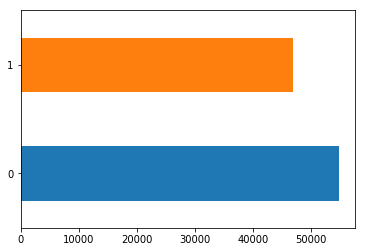

In [11]:
#Visualize Attributes
#distribution of target
df_clean_readmitted_tf = df_clean["readmitted_tf"].value_counts()
df_clean_readmitted_tf.plot(kind = 'barh')
plt.show()

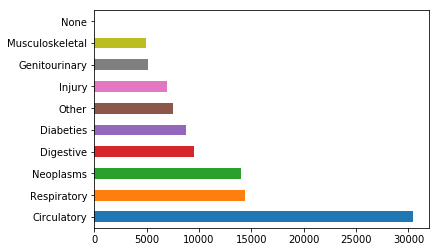

In [15]:
##distribution of diag_1_val
df_clean_readmitted_tf = df_clean["diag_1_val"].value_counts()
df_clean_readmitted_tf.plot(kind = 'barh')
plt.show()

In [19]:
#didn't work
#sns.jointplot(x="diag_1_val", y="readmitted_tf", data=df_clean)

C:\Users\N1110\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


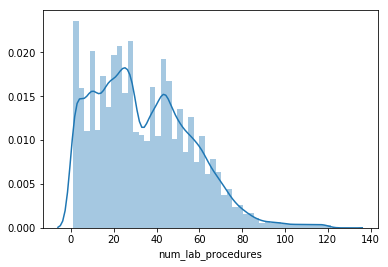

In [20]:
#density plot
sns.distplot(df_clean['num_lab_procedures'])
plt.show()

C:\Users\N1110\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


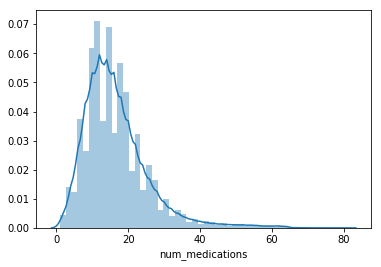

In [31]:
sns.distplot(df_clean['num_medications'])
plt.show()

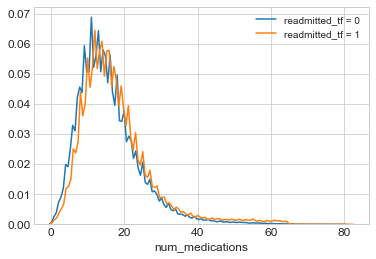

In [33]:
t0 = df_clean.loc[df_clean['readmitted_tf'] == 0]
t1 = df_clean.loc[df_clean['readmitted_tf'] == 1]

sns.set_style('whitegrid')
plt.figure()

sns.kdeplot(t0['num_medications'], bw = 0.5, label = 'readmitted_tf = 0')
sns.kdeplot(t1['num_medications'], bw = 0.5, label = 'readmitted_tf = 1')
plt.xlabel('num_medications', fontsize = 12)
locs, labels = plt.xticks()
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

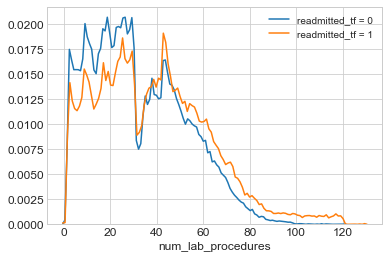

In [34]:

sns.kdeplot(t0['num_lab_procedures'], bw = 0.5, label = 'readmitted_tf = 0')
sns.kdeplot(t1['num_lab_procedures'], bw = 0.5, label = 'readmitted_tf = 1')
plt.xlabel('num_lab_procedures', fontsize = 12)
locs, labels = plt.xticks()
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

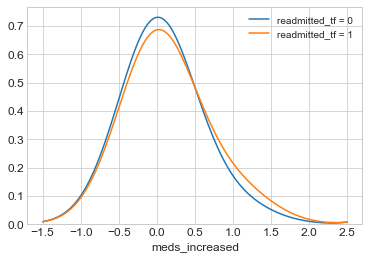

In [36]:
# meds_increased 

sns.kdeplot(t0['meds_increased'], bw = 0.5, label = 'readmitted_tf = 0')
sns.kdeplot(t1['meds_increased'], bw = 0.5, label = 'readmitted_tf = 1')
plt.xlabel('meds_increased', fontsize = 12)
locs, labels = plt.xticks()
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

In [ ]:
## Feature Density Plot
#can have a for loop to plot all features after cleaning, fore eg after gender tranform to 0 and 1

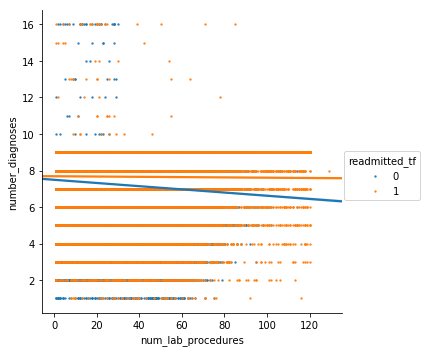

In [24]:
s = sns.lmplot(x = 'num_lab_procedures', y = 'number_diagnoses', data = df_clean, hue = 'readmitted_tf', fit_reg = True, scatter_kws = {'s' : 2})

plt.show()

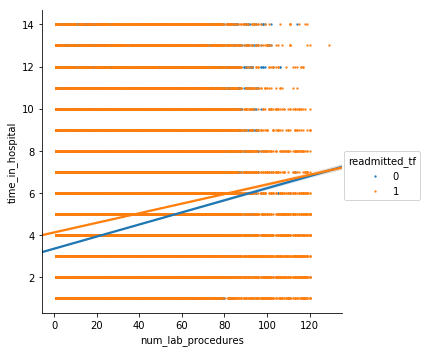

In [25]:
s = sns.lmplot(x = 'num_lab_procedures', y = 'time_in_hospital', data = df_clean, hue = 'readmitted_tf', fit_reg = True, scatter_kws = {'s' : 2})

plt.show()

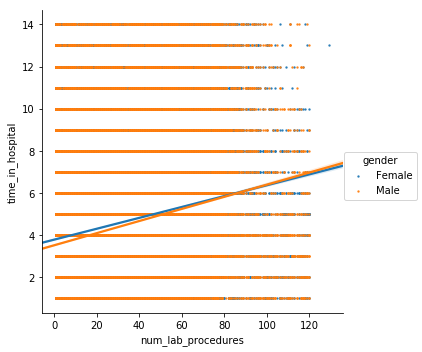

In [26]:
s = sns.lmplot(x = 'num_lab_procedures', y = 'time_in_hospital', data = df_clean, hue = 'gender', fit_reg = True, scatter_kws = {'s' : 2})

plt.show()

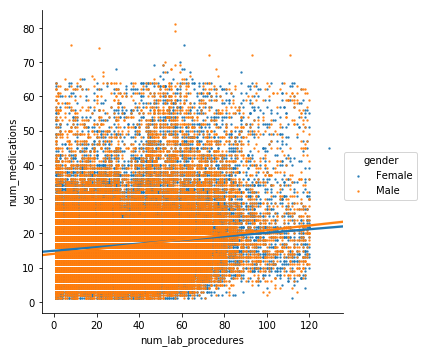

In [28]:

s = sns.lmplot(x = 'num_lab_procedures', y = 'num_medications', data = df_clean, hue = 'gender', fit_reg = True, scatter_kws = {'s' : 2})

plt.show()

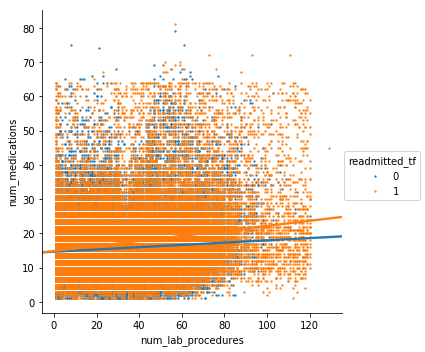

In [30]:
s = sns.lmplot(x = 'num_lab_procedures', y = 'num_medications', data = df_clean, hue = 'readmitted_tf', fit_reg = True, scatter_kws = {'s' : 2})

plt.show()